# Cogs 108 Final Project - How has Gun Violence Affect the Polls

## Overview

Gun violence has become a very hot topic lately due to the mass shootings at schools, concerts, and even in our own neighborhoods. It has emboldened both sides of the political spectrum; driving many to the polls to vote their beliefs and demand changes to the system. Even though this issue is a very controversial topic, we can not deny how it has greatly polarized this nation and caused a great schism between conservatives and liberals, Democrats and Republicans. On that note, we wanted to tackle this trend and see how congressional districts have changed due to gun violence; ultimately visualizing who is the dominant party of the state over time.

### Group Members and Contributions
- Victor Chi (A14489640)
-- Found datasets, read/cleaned datasets, and ran regression models and statistical test
- Evan Kay (A12631982)
-- Wrote introduction,background,ethics, and conclusion
- Weilin Liu (A14713406)
-- Made graphs and data table to visualize the trends
- Christopher Rocha (A92080262)
-- Performed typo checks in project.

## Part 1: Indroduction and Background

### Background

Gun violence is a booming topic that has caught our group's attention due to its significance in our daily lives. Just this year alone, there have been 147 mass shootings in the US, with 17 of those in California. This is especially important as the 2020 elections are right around the corner and politicians are using gun violence as leverage for their campaigns. With gun violence being a hot topic throughout the internet, there are dozens of articles that believe they have cracked the code for determining the connection between gun violence and voting habits. The issue with many of these articles are that they cannot all agree on a single verdict, and the correlation between the two remain a mystery.

[The Washington Post](https://www.washingtonpost.com/news/wonk/wp/2018/05/31/the-surprising-way-gun-violence-is-dividing-america/?noredirect=on&utm_term=.583b6e1bf7f8) looked into debunking the "public paradox" of gun control and political parties. It is generally assumed that Republican areas have more gun violence due to their views on bearing arms, but it is important to break down the statistics. Utilizing a similar data set, The Washington Post claims that there are 5.7 gun related deaths per 100,000 people per year in Republican counties, compared to 4.7 per 100,000 people in Democratic. This stat is a major misconception as it needs to be broken down into homocide related deaths and suicide related deaths. Republican counties' suicides outnumber homocide related deaths, while Democratic counties are the opposite. Further, Democratic counties have much higher populations (since they are large cities), which is naturally lower their death rates.

In general, gun violence is directly related to low-income and inequal areas, much of what associated with large cities. When these mass shootings occur in large cities, millions of people fear that it may affect them and vow to control guns. These lead to huge Democratic pushes towards gun control and fierce retaliation from Republicans fighting to their right to bear arms.

The overall increase in efforts by both the Democratic and Republican parties seem to have disrupted the previous norm, and we hope to uncover the true relationship between gun violence and congressional district voting. We will use data to guide us in a path that will triangulate the right conclusions and possibly see how a district will swing based on the increase or decrease of gun violence. 



### Research Question

Gun violence is a controversial topic that has impacted millions in our communities, so we will strictly focus on taking a data-based approach and utilizing big data to draw conclusions.

With that being said, we hope to predict and find indicators that determine how a state will vote, either Democratic or Republican, based on the amount number of gun violence incidents that has occured in that state during that year.

### Hypothesis

We believe that a decrease in gun violence will lead individual states to vote more Democratic.

Null Hypothesis: A decrease in gun violence will not effect in a state's voting.

Even though there is an increase in political activity due to gun violence, we believe that Republicans will have a stronger impact in swaying the state's vote due to two previous trends. First, there has been a significant increase in Republican voting activity when it comes to something that they strongly believe in, as can be seen in election race of 2016. Second, there has been a significant decrease in millenials voting. Note that milenials make up the majority of the population in large cities. These larger cities have a higher population density in comarison to the more sparsely populated Republican areas. As such, these milenial dominated cities would naturally have more gun violence but less of an impact on voter polls due to lack of milenial voting. There may be more factors that would sway the vote to be more Republican, but we believe that these two are dominating factors that drive our hypothesis.

### Datasets
The Datasets that we will be using to answer our question will consist of gun violence in each district of the United States. This will allow us to total up the amount of gun violence per district. In addition to this dataset, we will take voting records and their results to see how each district votes each election cycle. This will later be cumulated to see the general trend of the state as a whole.

Contains information about gun violence in each congressional district since 2012-2017. It has columns on location address, people involved, time of incident, and etc. However, we are only interested in the state column and the year.
- Dataset Name: Gun Violence Data
- Link to Dataset: https://www.kaggle.com/jameslko/gun-violence-data/home
- Number of observations: over 260k

This dataset will be used to see the winner of the district in each state per election cycle. It has a total of three election cycles (2014-2018). We will only be interested in the party of each election cycle,year, and state. 

Contains results of congressional voting data for each district
- Dataset Name: Congressional Voting Data
- Link to Dataset: http://library.cqpress.com/elections/download-data.php?filetype=&office=3&areatype=1&year=20122020&format=3&license=on&emailto=&emailfrom=
- Number of observations:  1600


## Dataset Cleaning

In [29]:
#Packages needed to clean the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
import warnings; warnings.simplefilter('ignore')

### Cleaning Congressional Voting Data
The congressional voting data was a very difficult dataset to obtain due to the website's limitations. It only allowed the user to download a certain amount of states at a time, so as a result the states had to be downloaded in multiple files. The following functions will allow us to clean our data efficiently by: 
- Read in all our datasets one by one as csv files.
- Concatenate them all together so cleaning the dataset as one will be much faster.
- Remove all columns except for the state, raceYear, and party winner.
- Remove NaN and other titles that were considered as rows, when the data sets were concatenated together.


In [30]:
# Reading in all voting records
states_1 = pd.read_csv("Alabama.csv",skiprows= 2)
states_2 = pd.read_csv('Alaska-Hawaii.csv', skiprows =2)
states_3 = pd.read_csv('Idaho-Massachusets.csv', skiprows = 2)
states_4 = pd.read_csv('Michigan to New Mexico.csv', skiprows = 2)
states_5 = pd.read_csv('New York-South Dakota.csv', skiprows = 2)
states_6 = pd.read_csv('Tennesee-Wyoming.csv', skiprows = 2)
states_1.head()

,Office,State,CensusPop,raceYear,Area,AreaNumber,RedistrictedDate,RepVotes,RepCandidate,RepStatus,...,ThirdVotes,ThirdCandidate,ThirdStatus,OtherVotes,PluralityVotes,PluralityParty,ThirdVotesTotalPercent,RepVotesMajorPercent,DemVotesMajorPercent,RaceNotes
0,House,Alabama,NaN,2018.0,District 1,1.0,20120101.0,"153,228","Byrne, Bradley",Incumbent,...,163,Write-In,Challenger,NaN,"64,002",R,0.07,63.20,36.80,NaN
1,House,Alabama,NaN,2016.0,District 1,1.0,20120101.0,"208,083","Byrne, Bradley",Incumbent,...,"7,810",Write-In,Challenger,NaN,"200,273",R,3.62,100.00,0.00,NaN
2,House,Alabama,NaN,2014.0,District 1,1.0,20120101.0,"103,758","Byrne, Bradley",Incumbent,...,198,Write-In,Challenger,NaN,"55,480",R,0.13,68.25,31.75,NaN
3,House,Alabama,NaN,2012.0,District 1,1.0,20120101.0,"196,374","Bonner, Josiah Robbins Jr.",Incumbent,...,"4,302",Scattered Write-In,Challenger,NaN,"192,072",R,2.14,100.00,0.00,NaN
4,House,Alabama,NaN,2018.0,District 2,2.0,20120101.0,"138,879","Roby, Martha",Incumbent,...,420,Write-In,Challenger,NaN,"51,948",R,0.19,61.50,38.50,NaN


We will now make all the datatables into one dataframe, so it will be easier to wrangle. We will then keep only the columns that we need (State,PluralityParty,raceYear).

In [31]:
# Concatenating all the states together
final_states = pd.concat([states_1, states_2,states_3,states_4,states_5,states_6])

In [32]:
# Cleaning dataset
pd.set_option('mode.chained_assignment', None)
congressional_data = final_states[['State','PluralityParty','raceYear']].dropna() #Removing rows that have NA
cleaned_congressional_data = congressional_data[congressional_data['State'] != 'State']
cleaned_congressional_data['raceYear'] = cleaned_congressional_data['raceYear'].astype(int)
cleaned_congressional_data.head()

,State,PluralityParty,raceYear
0,Alabama,R,2018
1,Alabama,R,2016
2,Alabama,R,2014
3,Alabama,R,2012
4,Alabama,R,2018


### Cleaning Gun Violence Data
The gun violence data set was already pretty clean since we obtained it from kaggle. However, it included a lot of information that we did not need to do our exploratory analysis. To clean our data we will:
- Read in our dataset
- Remove all columns except for the state and date
- Drop rows with NaN because they will not provide us with information we want

In [33]:
# Reading in Gun violence data
gun_data = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
# We will remove NaN because we will not know which congressional district the violence occurd
cleaned_gun_data = gun_data[['state','date','congressional_district']].dropna()
# Converting all the date to Years and dropping date
cleaned_gun_data['Date'] = pd.to_datetime(cleaned_gun_data['date'], errors='coerce')
cleaned_gun_data['Year'] = cleaned_gun_data['Date'].dt.year
cleaned_gun_data = cleaned_gun_data.drop(['date','Date','congressional_district'], axis = 1)
cleaned_gun_data.head()

,state,Year
0,Pennsylvania,2013
1,California,2013
2,Ohio,2013
3,Colorado,2013
4,North Carolina,2013


## Data Wrangling / Visualization
The following functions will allow us to visualize the data. We will use a bar plot to visualize the dominance of each party per congressional cycle. There will also be a trend line visualizing the total amount of violence in that state per year.

#### Making Functions to clean our data and make new data tables 

In [34]:
# Function to find total amound of gun violence in a specific state per year
def total_violence(state):
    total = []
    for i in range(2013,2019, 2):
        year1 = cleaned_gun_data.loc[cleaned_gun_data['Year'] == i]
        year2 = cleaned_gun_data.loc[cleaned_gun_data['Year'] == i+1]
        count = len(year1.loc[year1['state'] == state]) + len(year2.loc[year2['state'] == state])
        total.append(count)
    return total

In [35]:
#Function to find percentage Republican per election cycle in each state.
def percent_rep(s):
    percentage_rep = []
    for i in range(2014, 2019, 2):
        target = cleaned_congressional_data[(cleaned_congressional_data['State'] == s) & (cleaned_congressional_data['raceYear'] == i)]
        rep = len(target.loc[target['PluralityParty'] == 'R'])
        dem = len(target.loc[target['PluralityParty'] == 'D'])
        total = rep + dem
        percentage_rep.append(rep/total)
    return percentage_rep

In [36]:
#Function to find percentage Democrat per each election cycle in each state.
def percent_dem(s):
    percentage_dem = []
    for i in range(2014, 2019, 2):
        target = cleaned_congressional_data[(cleaned_congressional_data['State'] == s) & (cleaned_congressional_data['raceYear'] == i)]
        rep = len(target.loc[target['PluralityParty'] == 'R'])
        dem = len(target.loc[target['PluralityParty'] == 'D'])
        total = rep + dem
        percentage_dem.append(dem/total)
    return percentage_dem

In [37]:
#Making new data table plotting total violence in years of congressional elections
list_of_state = cleaned_congressional_data['State'].unique().tolist()
total_violence_list = []
for state in list_of_state:
    total_violence_list.append(total_violence(state))
df_total_violence = pd.DataFrame(np.array(total_violence_list), index=list_of_state, columns=[2014, 2016, 2018])
df_total_violence.head()

,2014,2016,2018
Alabama,1317,2256,1644
Alaska,132,793,232
Arizona,561,1002,691
Arkansas,572,1201,950
California,3750,6732,5310


In [38]:
#Percent Republican in each state
percent_rep_list = []
for state in list_of_state:
    percent_rep_list.append(percent_rep(state))
df_percent_rep = pd.DataFrame(np.array(percent_rep_list), index=list_of_state, columns=[2014, 2016, 2018])
df_percent_rep.head()

,2014,2016,2018
Alabama,0.857143,0.857143,0.857143
Alaska,1.000000,1.000000,1.000000
Arizona,0.555556,0.555556,0.444444
Arkansas,1.000000,1.000000,1.000000
California,0.264151,0.269231,0.132075


In [39]:
#Percent Democrat in each state
percent_dem_list = []
for state in list_of_state:
    percent_dem_list.append(percent_dem(state))
df_percent_dem = pd.DataFrame(np.array(percent_dem_list),index = list_of_state, columns = [2014, 2016, 2018])
df_percent_dem.head()

,2014,2016,2018
Alabama,0.142857,0.142857,0.142857
Alaska,0.000000,0.000000,0.000000
Arizona,0.444444,0.444444,0.555556
Arkansas,0.000000,0.000000,0.000000
California,0.735849,0.730769,0.867925


## Final Data Table of all our datasets put into one

We will now put together the previous three tables. The table is ordered alphabetically by state and then by year. We will show what percentage that are Democrat and Republican alongside the number of gun crimes reported.

In [40]:
states = pd.Series(list_of_state)
#Extract each value that is in the nested list for Democrats and Republicans
dem_list = []
for i in percent_dem_list:
    for j in i:
        dem_list.append(j)
rep_list = []
for i in percent_rep_list:
    for j in i:
        rep_list.append(j)
#Exract total violence for that specific state for that specific year
violence = []
for i in total_violence_list:
    for j in i:
        violence.append(j)
#Telling python to cycle through 2014,2016,2018 to align with states
data = {'PropR':rep_list, 'PropD':dem_list, 'Violence': violence, 'State': states.repeat(3)}
final_table = pd.DataFrame(data)
years = cycle(['2014','2016','2018'])
final_table['Year'] = [next(years) for year in range(len(final_table))]
final_table = final_table.set_index('Year')
final_table.head()

,PropR,PropD,Violence,State
Year,,,,
2014,0.857143,0.142857,1317,Alabama
2016,0.857143,0.142857,2256,Alabama
2018,0.857143,0.142857,1644,Alabama
2014,1.000000,0.000000,132,Alaska
2016,1.000000,0.000000,793,Alaska


## Visualization of Data
We have that our data is mirrored, meaning that the proportions added up to one. Hence, we decided to choose Democrats in order to see if our hypothesis is correct or not.

### Democrats  2014 

Proportion Democrats in the whole country:0.3845593979744924
Proportion Republicans in the whole country:0.6154406020255077


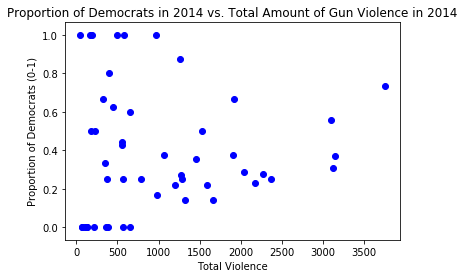

In [41]:
x = df_total_violence[2014].tolist()
y = df_percent_dem[2014].tolist()
plt.scatter(x, y, label="2014", color="blue")
plt.title('Proportion of Democrats in 2014 vs. Total Amount of Gun Violence in 2014') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)')
dem14 = sum(y)
print('Proportion Democrats in the whole country:' + str(dem14 / 50))
rep14 = sum(df_percent_rep[2014].tolist())
print('Proportion Republicans in the whole country:' + str(rep14 / 50))

### Democrats in 2016

Proportion Democrats in the whole country:0.40017199467199477
Proportion Republicans in the whole country:0.5998280053280053


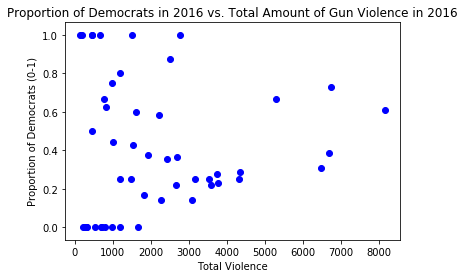

In [42]:
x = df_total_violence[2016].tolist()
y = df_percent_dem[2016].tolist()
plt.scatter(x, y, label="2016", color="blue")
plt.title('Proportion of Democrats in 2016 vs. Total Amount of Gun Violence in 2016') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)') 
dem16 = sum(y)
print('Proportion Democrats in the whole country:' + str(dem16 / 50))
rep16 = sum(df_percent_rep[2016].tolist())
print('Proportion Republicans in the whole country:' + str(rep16 / 50))

### Democrats in 2018

Proportion Democrats in the whole country:0.47172564756362945
Proportion Republicans in the whole country:0.6154406020255077


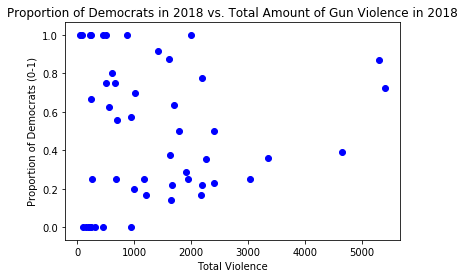

In [43]:
x = df_total_violence[2018].tolist()
y = df_percent_dem[2018].tolist()
plt.scatter(x, y, label="2018", color="blue")
plt.title('Proportion of Democrats in 2018 vs. Total Amount of Gun Violence in 2018') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)') 
dem18 = sum(y)
print('Proportion Democrats in the whole country:' + str(dem18 / 50))
rep18 = sum(df_percent_rep[2014].tolist())
print('Proportion Republicans in the whole country:' + str(rep18 / 50))

From the three graphs above, we can see a slight trend of more Democrats being voted into office as total violence increases in that state. This could be a sign that would support our hypothesis.

## Key Swing States
This will allow us to see if gun violence does have an impact on these key states. This is so because they are not considered "solid" Democrat or Republican, which would give us a gauge of how important gun violence is to them. Key states are a better representation of our country because they are the only ones that sway between party from year to year.

In [44]:
# Gathering all the swing states together.
swing_states = ['Colorado', 'Florida', 'Iowa', 'Michigan', 'Minnesota', 'Ohio', 'Nevada', 'New Hampshire', 'North Carolina', 'Pennsylvania', 'Virginia', 'Wisconsin']
df_total_violence_swing = df_total_violence.loc[swing_states]
df_percent_rep_swing = df_percent_rep.loc[swing_states]
df_percent_dem_swing = df_percent_dem.loc[swing_states]


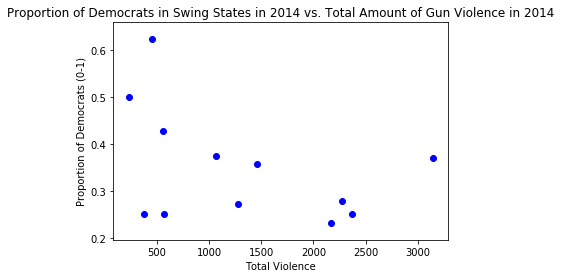

In [45]:
x = df_total_violence_swing[2014].tolist()
y = df_percent_dem_swing[2014].tolist()
plt.scatter(x, y, label="2014", color="blue")
plt.title('Proportion of Democrats in Swing States in 2014 vs. Total Amount of Gun Violence in 2014') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)') 
avg_rep_swing = [sum(df_percent_rep_swing[2014].tolist())/12, sum(df_percent_rep_swing[2016].tolist())/12, sum(df_percent_rep_swing[2018].tolist())/12]
avg_dem_swing = [sum(df_percent_dem_swing[2014].tolist())/12, sum(df_percent_dem_swing[2016].tolist())/12, sum(df_percent_dem_swing[2018].tolist())/12]

Text(0, 0.5, 'Proportion of Democrats (0-1)')

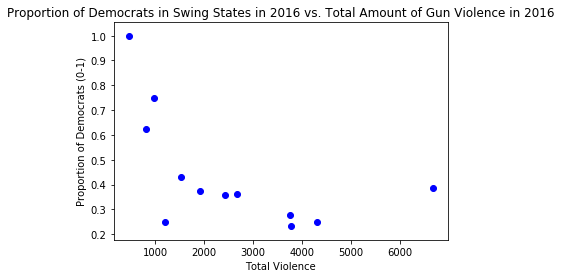

In [46]:
x = df_total_violence_swing[2016].tolist()
y = df_percent_dem_swing[2016].tolist()
plt.scatter(x, y, label="2016", color="blue")
plt.title('Proportion of Democrats in Swing States in 2016 vs. Total Amount of Gun Violence in 2016') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)') 

Text(0, 0.5, 'Proportion of Democrats (0-1)')

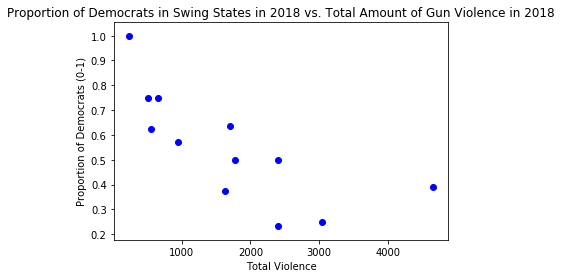

In [47]:
x = df_total_violence_swing[2018].tolist()
y = df_percent_dem_swing[2018].tolist()
plt.scatter(x, y, label="2018", color="blue")
plt.title('Proportion of Democrats in Swing States in 2018 vs. Total Amount of Gun Violence in 2018') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)') 

# Running Statistical Analysis

We will now begin running statistical analysis on the graph that visualises the data for all the states with the gun violence reports. We shall construct a linear regression to allow us to better visually see the general direction of each year.

## Linear Regression

In [48]:
#imports to perform our linear regression and statistics
from  matplotlib import pyplot
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [49]:
#function to run linear regression on our tables
def regression(year):
    x_values=df_total_violence[year].values[:,np.newaxis]
    y_values=df_percent_dem[year].values[:,np.newaxis]

    violence_reg = linear_model.LinearRegression()
    violence_reg.fit(x_values, y_values)
    prediction=violence_reg.predict(np.sort(x_values, axis=0))

    pyplot.scatter(x_values, y_values)
    pyplot.plot(np.sort(x_values, axis=0),prediction,color = 'blue')
    plt.title('Proportion of Democrats in each State in {0} vs. Total Amount of Gun Violence in {0}'.format(year)) 
    plt.xlabel('Total Violence') 
    plt.ylabel('Proportion of Democrats (0-1)') 
    return pyplot.show()
def statistics(year):
    x = df_total_violence[year].values[:,np.newaxis]
    y = df_percent_dem[year].values[:,np.newaxis]
    x, y = np.array(x), np.array(y)
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    results = model.fit()
    return results

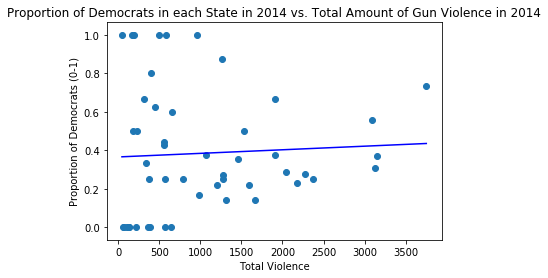

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1417
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.708
Time:                        22:49:44   Log-Likelihood:                -14.042
No. Observations:                  50   AIC:                             32.08
Df Residuals:                      48   BIC:                             35.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3655      0.069      5.326      0.000       0.228       0.503
x1          1.867e-05   4.96e-05      0.376      0.708   -8.11e-05       0.000
==============================================================================
Omnibus:                        5.076   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                4.764
Skew:                           0.695   Prob(JB):                       0.0924
Kurtosis:                       2.403   Cond. No.                     2.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#running linear regression for 2014
regression(2014)
stat14 = statistics(2014)
stat14.summary()

##### Analysis for 2014 Regression
From this linear regression test of the whole country in 2014, we see that there is almost no correlation at all due to the R^2 value being .003. We also get a p-value that is greater than .05, which would lead us to believe that there is no significance here. It would lead us to accept the alternate hypothessis.

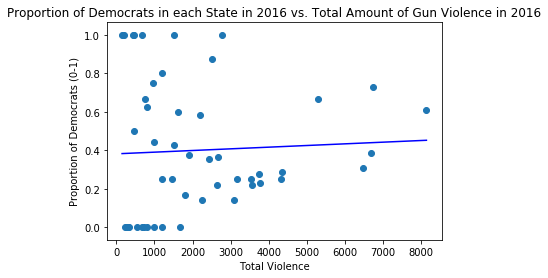

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1144
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.737
Time:                        22:49:45   Log-Likelihood:                -17.091
No. Observations:                  50   AIC:                             38.18
Df Residuals:                      48   BIC:                             42.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3817      0.073      5.198      0.000       0.234       0.529
x1          8.658e-06   2.56e-05      0.338      0.737   -4.28e-05    6.01e-05
==============================================================================
Omnibus:                        7.239   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.518
Skew:                           0.564   Prob(JB):                        0.104
Kurtosis:                       2.054   Cond. No.                     4.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#running linear regression for 2016
regression(2016)
stat16 = statistics(2016)
stat16.summary()

##### Analysis for 2016 Regression
From this linear regression test of the whole country in 2016, we see that there is almost no correlation at all due to the R^2 value being .002. We also get a p-value that is greater than .05, which would lead us to believe that there is no significance here. It would lead us to accept the alternate hypothessis.

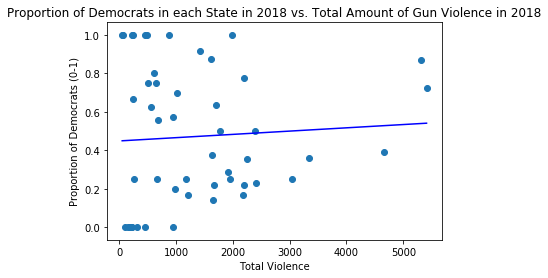

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1823
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.671
Time:                        22:49:45   Log-Likelihood:                -18.679
No. Observations:                  50   AIC:                             41.36
Df Residuals:                      48   BIC:                             45.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4487      0.074      6.067      0.000       0.300       0.597
x1          1.704e-05   3.99e-05      0.427      0.671   -6.32e-05    9.73e-05
==============================================================================
Omnibus:                       22.476   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.311
Skew:                           0.244   Prob(JB):                        0.116
Kurtosis:                       1.647   Cond. No.                     2.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#running linear regression for 2018
regression(2018)
stat18 = statistics(2018)
stat18.summary()

##### Analysis for 2018 Regression
From this linear regression test of the whole country in 2018, we see that there is almost no correlation at all due to the R^2 value being .004. We also get a p-value that is greater than .05, which would lead us to believe that there is no significance here. It would lead us to accept the alternate hypothessis.

### Linear Regression on Swing States
We will now perform linear regression on swing states to see if there is an event that would lead us to accept our null hypothesis. We will first log our data values of our swing state in order to perform a better regression on the values. Taking the log will make the data more linearized.

In [53]:
#linearizing the data set for swing states
df_percent_dem_swing = np.log10(df_percent_dem_swing)

In [54]:
def swing_states(year):
    x_values=df_total_violence_swing[year].values[:,np.newaxis]
    y_values=df_percent_dem_swing[year].values[:,np.newaxis]

    violence_reg = linear_model.LinearRegression()
    violence_reg.fit(x_values, y_values)
    prediction=violence_reg.predict(np.sort(x_values, axis=0))

    pyplot.scatter(x_values, y_values)
    pyplot.plot(np.sort(x_values, axis=0),prediction,color = 'blue')
    plt.title('Proportion of Democrats in Swing States in {0} vs. Total Amount of Gun Violence in {0}'.format(year)) 
    plt.xlabel('Total Violence') 
    plt.ylabel('Proportion of Democrats (0-1)') 
    return pyplot.show()
def statistics(year):
    x = df_total_violence_swing[year].values[:,np.newaxis]
    y = df_percent_dem_swing[year].values[:,np.newaxis]
    x, y = np.array(x), np.array(y)
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    results = model.fit()
    return results

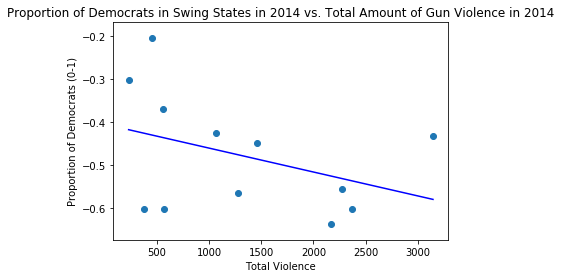

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.768
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.213
Time:                        22:49:46   Log-Likelihood:                 8.2449
No. Observations:                  12   AIC:                            -12.49
Df Residuals:                      10   BIC:                            -11.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4045      0.068     -5.981      0.000      -0.555      -0.254
x1         -5.565e-05   4.18e-05     -1.330      0.213      -0.000    3.76e-05
==============================================================================
Omnibus:                        0.616   Durbin-Watson:                   2.499
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.585
Skew:                           0.196   Prob(JB):                        0.746
Kurtosis:                       1.991   Cond. No.                     2.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
swing_states(2014)
swing14 = statistics(2014)
swing14.summary()

##### Analysis for 2014 Regression on Swing States
From this linear regression test of the swing states in 2014, we see that there is almost no correlation, but a small increase, and our R^2 value is .150. We also get a p-value that is greater than .05, which would lead us to believe that there is no significance here. It would lead us to accept the alternate hypothessis.

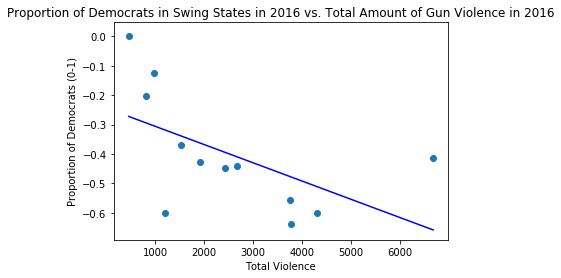

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     4.618
Date:                Wed, 05 Jun 2019   Prob (F-statistic):             0.0572
Time:                        22:49:46   Log-Likelihood:                 5.0606
No. Observations:                  12   AIC:                            -6.121
Df Residuals:                      10   BIC:                            -5.151
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2439      0.089     -2.741      0.021      -0.442      -0.046
x1          -6.21e-05   2.89e-05     -2.149      0.057      -0.000    2.29e-06
==============================================================================
Omnibus:                        0.279   Durbin-Watson:                   2.434
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.400
Skew:                           0.265   Prob(JB):                        0.819
Kurtosis:                       2.278   Cond. No.                     5.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
swing_states(2016)
swing16 = statistics(2016)
swing16.summary()

##### Analysis for 2016 Regression on Swing States
From this linear regression test of the swing states in 2016 we see that there is almost no correlation, but a small increase of our R^2 value to .316. We see that our p-value falls to be around .05, which would lead us to maybe accept our null hypothesis, but our R^2 value tells us that the values are not that strongly correlated, so our p-value is not that reflective of our population.

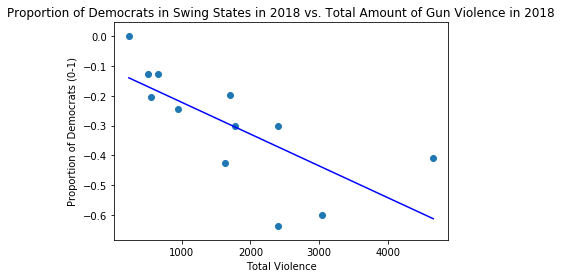

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     10.38
Date:                Wed, 05 Jun 2019   Prob (F-statistic):            0.00915
Time:                        22:49:46   Log-Likelihood:                 7.5541
No. Observations:                  12   AIC:                            -11.11
Df Residuals:                      10   BIC:                            -10.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1144      0.070     -1.637      0.133      -0.270       0.041
x1            -0.0001   3.32e-05     -3.221      0.009      -0.000    -3.3e-05
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   2.419
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.600
Skew:                          -0.490   Prob(JB):                        0.741
Kurtosis:                       2.510   Cond. No.                     3.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
swing_states(2018)
swing18 = statistics(2018)
swing18.summary()

##### Analysis for 2018 Regression on Swing States
From this linear regression test of the swing states in 2018 we see that there is almost no correlation, but a small increase of our R^2 value to .509. We see that our p-value falls belows .05, which would lead us to accept our null hypothesis, but our R^2 value tells us that the values are not that strongly correlated, so our p-value is not that reflective of our population.

We will now construct our final table. This will contain the results of our statistical analysis by displaying the following:

    Coefficient values
    P values
    R squared values
    Percent of Democrat Voters in swing states
    Percent of Republican Voters in swing states
    

### Final Table Results for Whole Country

In [58]:
overall_coef = [stat14.params[1], stat16.params[1], stat18.params[1]]
overall_pvalues = [stat14.pvalues[1], stat16.pvalues[1], stat18.pvalues[1]]
overall_rsquared = [stat14.rsquared, stat16.rsquared, stat18.rsquared]
avg_rep = [sum(df_percent_rep[2014].tolist())/50, sum(df_percent_rep[2016].tolist())/50, sum(df_percent_rep[2018].tolist())/50]
avg_dem = [sum(df_percent_dem[2014].tolist())/50, sum(df_percent_dem[2016].tolist())/50, sum(df_percent_dem[2018].tolist())/50]
d = {'Coef': overall_coef, 'P-values': overall_pvalues, 'R-squared': overall_rsquared, 'Average Democrats': avg_dem, 'Average Republican': avg_rep}
overall_df = pd.DataFrame(data=d, index=['2014', '2016', '2018'])
overall_df

,Coef,P-values,R-squared,Average Democrats,Average Republican
2014,0.000019,0.708259,0.002943,0.384559,0.615441
2016,0.000009,0.736610,0.002379,0.400172,0.599828
2018,0.000017,0.671292,0.003784,0.471726,0.528274


### Final Table Results for Swing States

In [59]:
swing_coef = [swing14.params[1], swing16.params[1], swing18.params[1]]
swing_pvalues = [swing14.pvalues[1], swing16.pvalues[1], swing18.pvalues[1]]
swing_rsquared = [swing14.rsquared, swing16.rsquared, swing18.rsquared]
d = {'Coef': swing_coef, 'P-values': swing_pvalues, 'R-squared': swing_rsquared, 'Swing Average Democrats': avg_dem_swing, 'Swing Average Republican': avg_rep_swing}
swing_df = pd.DataFrame(data=d, index=['2014', '2016', '2018'])
swing_df

,Coef,P-values,R-squared,Swing Average Democrats,Swing Average Republican
2014,-0.000056,0.213128,0.150259,0.348947,0.651053
2016,-0.000062,0.057175,0.315891,0.441043,0.558957
2018,-0.000107,0.009153,0.509264,0.548322,0.451678


### Final Table Analysis
After viewing all our data in the two tables we can see that there is more "action" going on in the swing states. Swing states have a stronger R^2 value and significant p-values, but we will discuss how they are not that representative of the population in our conclusion. Both data tables have very small coefficients, which would lead us to believe that there is a very, very weak association between our datasets.

## Ethics and Privacy

Since we used two data sets from two different websites, we can take a look at each one individually and discuss concerns and how they were handled.

The first data set was regarding gun violence from Kaggle. Kaggle is a great source for publicly available data sets without any restrictions. This data set listed all gun violence incidents throughout the US over several years, with extensive details regarding the incident. The list itself does contain concerning data, such as extensive details on the gun violence event such as city, ages of those involved and exact latitude and longitude. Also, it contains links to articles on each gun incident which could lead to an article posting the names of either the criminals or victims. Since all of this information is outside the scope of our project and there are other more vague, columns that satisfy our needs, we chose to drop all columns except those that were broad and assisted in our analysis. This data came from [the Gun Violence Archive](http://www.gunviolencearchive.org/), whos main goal is to spread data regarding gun violence without taking a side. While the data itself my not seem bias, it is concerning that the website also has a "Analysis & Opinion" section, which obviously displays bias within the organization itself. Fortunately, with such a vast data set we believe that the data itself is sufficient for analysis.

The second data set was extremely difficult to obtain through the [website](http://library.cqpress.com/elections/index.php) we used. The CQ Voting website had an institution lock and user download restrictions that made it difficult to obtain and utilize the data. CQ does allow users to view and download the data for their personal analysis, but they make it challenging to do so. The data itself was fairly clean, but included the full names of political candidates running in the election. Since their names are unrelated to our data analysis, we removed all columns except year, state and plurality party. Just from looking through the CQ website, we were unable to find any bias of concern in the data.

## Discussion and Conclusion

After careful analysis of our data sets and looking at various correlations, we were able to come to a conclusion regarding whether gun violence actually impacts the voting trends. We began our analysis by strictly analyzing the United States as a whole by plotting the gun violence and voting trends for each state, by taking the sum of all the districts within it, on one plot. We looked at this plot over the span of 6 years and determined that for each year, there was no correlation between gun violence and how each state voted. This can be seen by looking at the statistical results of our analysis. Most importantly, we can see that the p-value is larger than 0.5 which strongly encourages acceptance of the null hypothesis. The r-squared values for each year are negative or low for the overall US meaning that there is little to no correlation between the two data sets. For the entirety of the US, the statistical evidence leads us to reject our hypothesis and accept the null hypothesis:

>>>>> **A decrease in gun violence will have no affect in how a state votes.**

In an attempt decipher the data set and further analyze the possibility of gun violence affecting voter trends, we decided to analyze swing states individually. The reason we focused on swing states is because we believe that non-swing states are already one-side dominant beyond the point of gun violence affecting their voter outcome. To further dive down into the correlation in swing states, we took the log of the data in attempt to make the data less skewed. Looking at the statistical results of one the swing states for each year instead of the entirety of the US, we can see that the r-squared values are slightly higher which means that we do see more correlation than that of the entire US. The r-squared value is still small which will lead us to conclude that the p value is insignificant in our results. The p - value is insignificant to our results because we do not see a strong correlation between the two, which means there are other confounding factors at play. We will discuss the confounding factors in the next paragraph. Lastly, the coefficient proves that there is minimal correlation between the two. The value is very small, so an increase of that value on the x axis would have no impact on the y. Even though we were able to see a more significant correlation between gun violence and percentage of democratic voters in swing states, the statistical results prove that there is still little to no correlation between the two. Because of this, we must reject our hypothesis and accept the null hypothesis.

After taking a deep dive into the data and concluding that there is no correlation between gun violence and percentage of democratic voters, it is important to understand how our data analysis was limited and in what ways we can improve. One of the most prominent limitations/confounding factors within our data is the inability to individually identify the affect of gun violence. It is easy for big data analysis to find correlations, but it will always fail to recognize how other worldly/national events or trends affect the big data. In our case, gun violence was not the only major topic in the span of these elections. The population of the data taken could also have a big impact on how the data turns out. Limitations also include only plotting the whole state and not the districts themeselves. This could have left out a lot of information on the micro level of the country, but we only see the broad cases due to only plotting the states. We also limit our analysis by only plotting swing states, which only represent one of the clustering possible. Using other clustering methods could have revealed more information. The next steps for our analysis would be to identify the major topics of discussion for these elections and perform even larger data analysis to hone in on how each topic of discussion affected the outcome of people who voted democratically. In conclusion, we hope that our data is able to give insight to campaign analysts throughout the election process for better prediction and marketing models.


## References

https://www.washingtonpost.com/news/wonk/wp/2018/05/31/the-surprising-way-gun-violence-is-dividing-america/?noredirect=on&utm_term=.583b6e1bf7f8

https://www.gunviolencearchive.org/reports/mass-shooting